# Predicting Car Prices

We'll practice the machine learning workflow to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

## Introduction to the data set

Data Set Information:

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.


Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

from https://archive.ics.uci.edu/ml/datasets/automobile

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('imports-85.data')

In [3]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


We imported the data, but there's problem. It doesn't look like the the dataset includes the header. We will have to manually assign the header. Fortunately, we have header names available from the source dataset. 

In [4]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df = pd.read_csv('imports-85.data', names=cols)
print(df.shape)
df.head()


(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now we can see 205 records with 26 columns imported. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

There are 10 numerics columns and 16 non-numerics columns. Let's explore little further to which columns could be used for features. 

There is one sticking out the most, which is price column. The goal of this project is to determine if we could predict the price. If it's not in numeric value we can't really predict it. 

In [6]:
df['price'].value_counts()

?        4
7775     2
8845     2
16500    2
9279     2
5572     2
7957     2
18150    2
6692     2
7295     2
8495     2
13499    2
8921     2
6229     2
7609     2
7898     2
10795    1
13200    1
13295    1
7975     1
11248    1
5499     1
7689     1
11900    1
11595    1
5389     1
14489    1
7895     1
6695     1
8558     1
        ..
12764    1
9495     1
9959     1
18920    1
15510    1
22018    1
30760    1
7129     1
24565    1
7126     1
6795     1
34184    1
8195     1
23875    1
13415    1
18280    1
31600    1
45400    1
32528    1
6295     1
21105    1
18950    1
9095     1
15998    1
8358     1
13845    1
15985    1
9298     1
10595    1
21485    1
Name: price, Length: 187, dtype: int64

## Data Cleaning

From above, we can see they used ? for unknown values. In fact, other columns are doing it the same thing. We are going to replace ? with NaN values.

In [7]:
df.replace('?', np.nan, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-nul

These columns are in numeric values. 

normalized-losses: continuous from 65 to 256.
wheel-base: continuous from 86.6 120.9.  
length: continuous from 141.1 to 208.1.  
width: continuous from 60.3 to 72.3.  
height: continuous from 47.8 to 59.8.   
curb-weight: continuous from 1488 to 4066.  
engine-size: continuous from 61 to 326.  
bore: continuous from 2.54 to 3.94.  
stroke: continuous from 2.07 to 4.17.  
compression-ratio: continuous from 7 to 23.  
horsepower: continuous from 48 to 288.   
peak-rpm: continuous from 4150 to 6600.  
city-mpg: continuous from 13 to 49.  
highway-mpg: continuous from 16 to 54.  
price: continuous from 5118 to 45400.

In [9]:
df = df.astype({'normalized-losses':float,'wheel-base': float,'length': float,
                'width': float, 'height': float,'curb-weight':int,
                'engine-size': int,'bore':float, 'stroke':float,
                'horsepower': float, 'peak-rpm': float, 'price':float
          })

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-

It looks like all numeric columns now have numeric values. 

However, normalized-losses column has lots of missing values. Let's investigate.

In [11]:
df['normalized-losses'].isnull().value_counts(normalize = True)

False    0.8
True     0.2
Name: normalized-losses, dtype: float64

About 20% of data is missing in normalized-losses column. There doesn't seem to be a effective way to fill in the missing values. It's probalby better to exclude the column from the features. 

### Missing Values

The goal is accurately predict the price for the vehicle. If the price coulmn has missing values, we can't really consider the row to be included in the set. Let's drop the rows that are missing price values.

With KNN algorithms, we can't have missing values in the dataset. We will have to: 

- Replace the missing values using the average values from that column.
- Drop the rows entirely (especially if other columns in those rows have missing values).
- Drop the column entirely.

In [12]:
df = df.dropna(axis = 0, how = 'any', subset = ['price'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    164 non-null float64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         199 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression-rate     201 non-null float64
horsepower           199 non-

Filling all missing values with mean.

In [14]:
df.fillna(df.mean(), inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null float64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         199 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     201 non-null float64
horsepower           201 non-

Now all numerical features have values. Let's drop the columns that we aren't going to use for the features. 


In [16]:
df.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type'
        , 'num-of-cylinders','fuel-system' ],axis =1, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 16 columns):
symboling            201 non-null int64
normalized-losses    201 non-null float64
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-size          201 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
city-mpg             201 non-null int64
highway-mpg          201 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(5)
memory usage: 26.7 KB


Now we only have numeric values. 

### Normalizing values

To represent each feature values fairly, the values need to be normalized. For instance peak-rpm has average value of 5117.59, while symboling has 0.84. With that, we will naturally be over compensating peak-rpm values over symboling values. To prevent that from happening, we can normalize the values to flatten the range of values in each features. 


In [18]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [19]:
columns = df.columns.tolist()
price = df['price']
df = (df - df.min())/(df.max() - df.min())
df['price'] = price

In [20]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [28]:
def knn_train_test(features,labels,df):
    knn = KNeighborsRegressor()
    np.random.seed(1) # Setting random seed for reproducible result
    
    # Randomize the dataset to remove the potential bias
    rand_idx = np.random.permutation(df.index)
    rand_df = df.loc[rand_idx]
    
    train_set = rand_df.iloc[0:101]
    test_set = rand_df.iloc[101:]
    knn.fit(train_set[features], train_set[labels])
    predictions = knn.predict(test_set[features])
    mse = mean_squared_error(test_set[labels],predictions)
    return mse**(1/2)

In [29]:
columns = df.columns.tolist()
columns.remove('price')

univariate_rmse = {}
for feature in columns:
    univariate_rmse[feature] = knn_train_test([feature], 'price', df)
    

In [30]:
pd.Series(univariate_rmse).sort_values()

engine-size          3224.674783
horsepower           4021.518756
curb-weight          4424.912852
width                4593.417311
highway-mpg          4673.141660
city-mpg             4988.756819
wheel-base           5496.065574
length               5521.659712
compression-rate     6726.451723
bore                 7132.531048
peak-rpm             7219.976135
stroke               7815.517720
height               7863.292279
normalized-losses    8000.466322
symboling            8026.716015
dtype: float64

From the result above, engine-size is the feature that has the least RMSE. That was with default k, which is 5. Let's run experiment with other common k values. 

In [31]:


def knn_train_test(features,labels,df):

    np.random.seed(1) # Setting random seed for reproducible result
    
    # Randomize the dataset to remove the potential bias
    rand_idx = np.random.permutation(df.index)
    rand_df = df.loc[rand_idx]
    
    k_univariate_rmse = {}
    
    train_set = rand_df.iloc[0:101]
    test_set = rand_df.iloc[101:]
    for k in [1,3,5,7,9]:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[features], train_set[labels])
        predictions = knn.predict(test_set[features])
        mse = mean_squared_error(test_set[labels],predictions)
        k_univariate_rmse[k] = mse**(1/2)
    return k_univariate_rmse

In [32]:
univariate_rmse = {}
for feature in columns:
    univariate_rmse[feature] = knn_train_test([feature], 'price', df)

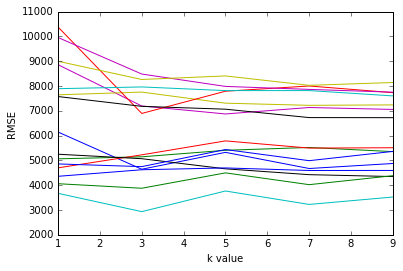

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

for key, value in univariate_rmse.items():
    x = list(value.keys())
    y = list(value.values())
    x.sort()
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


## Multivaiate Model

Top five features from univariate model.

engine-size          3224.674783  
horsepower           4021.518756  
curb-weight          4424.912852  
width                4593.417311  
highway-mpg          4673.141660  

In [63]:
best_features = {'two_best_features': ['engine-size','horsepower'],
'three_best_features': ['engine-size','horsepower','curb-weight'],
'four_best_features': ['engine-size','horsepower','curb-weight','width'],
'five_best_features': ['engine-size','horsepower','curb-weight','width','highway-mpg']}
 

In [57]:

def knn_train_test(features,labels,df):
    knn = KNeighborsRegressor()
    np.random.seed(1) # Setting random seed for reproducible result
    
    # Randomize the dataset to remove the potential bias
    rand_idx = np.random.permutation(df.index)
    rand_df = df.loc[rand_idx]
    
    train_set = rand_df.iloc[0:101]
    test_set = rand_df.iloc[101:]
    knn.fit(train_set[features], train_set[labels])
    predictions = knn.predict(test_set[features])
    mse = mean_squared_error(test_set[labels],predictions)
    return mse**(1/2)

In [58]:
univariate_rmse = {}

In [64]:
for key, value in best_features.items():
    univariate_rmse[key] = knn_train_test(value, 'price', df)

In [65]:
univariate_rmse

{'five_best_features': 3410.6818843744427,
 'four_best_features': 3490.3631757168196,
 'three_best_features': 3437.964685682504,
 'two_best_features': 2949.6709072708436}

Two features show the best performance. We are going to optimize the hyperparameter for it.

## Hyperparameter Tuning

In [68]:
def knn_train_test(features,labels,df):

    np.random.seed(1) # Setting random seed for reproducible result
    
    # Randomize the dataset to remove the potential bias
    rand_idx = np.random.permutation(df.index)
    rand_df = df.loc[rand_idx]
    
    k_univariate_rmse = {}
    
    train_set = rand_df.iloc[0:101]
    test_set = rand_df.iloc[101:]
    for k in [i for i in range(1,26)]:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[features], train_set[labels])
        predictions = knn.predict(test_set[features])
        mse = mean_squared_error(test_set[labels],predictions)
        k_univariate_rmse[k] = mse**(1/2)
    return k_univariate_rmse

In [70]:
two_feature_rmse = knn_train_test(best_features['two_best_features'],'price',df)

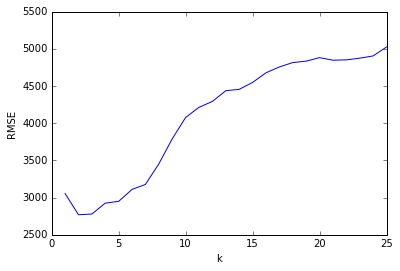

In [73]:
two_feature_rmse

x = list(two_feature_rmse.keys())
y = list(two_feature_rmse.values())
plt.plot(x,y)
plt.xlabel('k')
plt.ylabel('RMSE')
    

## Conclusion

Suprisingly, it was optimal when k was 3 from the result above. 